In [2]:
import pandas
import configparser
import psycopg2

In [3]:


config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd = config['myaws']['pwd']

conn = psycopg2.connect(  host=host,
                       user=user,
                       password = pwd,
                       dbname=db)



In [4]:
cur=conn.cursor()

In [7]:
sql_q1= """
        select * from demo.student"""

In [9]:
df_q1=pandas.read_sql_query(sql_q1,conn)
df_q1[:]

,s_email,s_name,major
0,s1@jmu.edu,s1,m1
1,s2@jmu.edu,s2,m2
2,s3@jmu.edu,s3,m1
3,s4@jmu.edu,s4,m2
4,s5@jmu.edu,s5,ia
5,s6@jmu.edu,s6,ia


In [12]:
sql_q2="""
        select demo.professor.p_name,
            demo.course.c_name
            from demo.professor
            inner join demo.course
            on demo.professor.p_email=demo.course.p_email
        """

In [13]:
df_q2=pandas.read_sql_query(sql_q2,conn)
df_q2[:]

,p_name,c_name
0,t2,cn3
1,t3,cn4
2,p_new_n,c_new_name
3,p_new_n,cn1
4,p_new_n,cn2


In [16]:
sql_q3 = """
          select c_number,
          count(*) as course_count
          from demo.enroll_list
          group by c_number
            """

<AxesSubplot:xlabel='c_number'>

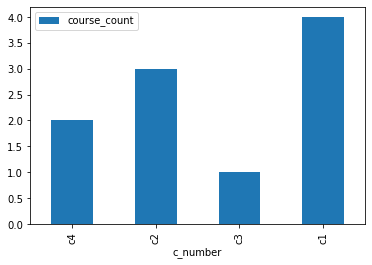

In [20]:
df_q3=pandas.read_sql_query(sql_q3,conn)
df_q3.plot.bar(x='c_number',y='course_count')

In [23]:
sql_q4="""
        select demo.professor.p_name,
            count(demo.course.c_name) as num_couse
            from demo.professor
            inner join demo.course
            on demo.professor.p_email=demo.course.p_email
            group by demo.professor.p_name
        """

<AxesSubplot:xlabel='p_name'>

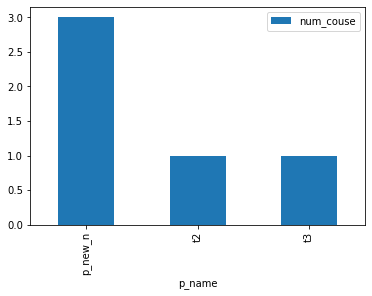

In [24]:
df_q4=pandas.read_sql_query(sql_q4,conn)
df_q4.plot.bar(x='p_name',y='num_couse')